Introduction
--------------
Electrocardiography is the measurement of electrical activities in the heart which can be seen as a trace on a screen through the use of an electrocardiogram in determining state of health of a patient by observing waveform peaks or monitoring heart rythm to  reach an informed clinical conclusion.  An ECG is generated by a nerve impulse stimulus to the heart; with each beat this nerve impulse or wave travels through the heart which causes the muscle to squeeze and pump blood to the heart. [1]
An ECG gives two major kinds of information. First, by measuring time intervals on the ECG, a doctor can determine how long the electrical wave takes to pass through the heart. Finding out how long a wave takes to travel from one part of the heart to the next shows if the electrical activity is normal or slow, fast or irregular
The Electrocardiogram (ECG) is a diagnostic tool that gives graphical measurements and recordings on the electrical activity of the heart over time. It is commonly used for diagnosing diseases by deducing the ECG signal. 

A normal heart beat / ECG signal is a combination of sinusoidal and triangular waveforms (P wave, QRS complex and T wave)  and these waveforms can be separated into; the isoelectric line (horizontal line with no electric activity), segments (the duration of isoelectric line between waves), and intervals (the time between the same segments of adjacent waves). 

The P wave represents the electrical activity of the atria ("atrial depolarization"), which are the two small chambers located at the top of the heart. The QRS complex which is the tallest most visible aspect of the trace represents ventricular depolarization i.e electrical activity of ventricles which are the two large chambers located at the bottom of the heart that forcefully pump blood throughout the body and theST segment which is a flat segment following the QRS complex that it provides important information to physicians about things such as potential heart attacks.
Lastly, the T wave shows the lower hear chamber resetting and preparing for the next muscle contraction. [2]

The next section shows an ECG waveform from a file provided, and using python and we analyse the trace in other sections of this notebook by obtainingnthe heart rate and discrete fourier Transfrom, DFT of the acquired ECG signal





(Q4) Opening ECG File


 The length of the file is: 43081


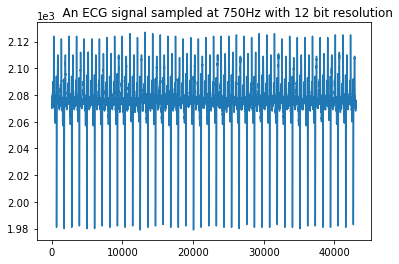

In [277]:

%matplotlib inline

import scipy as Sci
import scipy.linalg
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
f = open('aami3a.dat','rb')
AllSignal = np.fromfile(f,count=-1,dtype=np.uint16)
print('\n The length of the file is: ' + str(len(AllSignal)))
plt.plot(AllSignal[:43081])
plt.title('            An ECG signal sampled at 750Hz with 12 bit resolution')# Parameters as provided
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
f.close()

(Q5) Calculating Number Of Samples


Determining number of samples individual at rest with an average heart rate between 60 and 100 bpm to obtain 5 beats

                                                                             
    Assuming a heart rate of 80bpm (average of 60 and 100bpm) gives 1.33 beat per second
    For 5 beats 1.33.*5 = 6.67sec (approximation)
    sampling time = 1/750HZ
    
    Number of samples (Ns) = Total no of beats per sec/ sampling time
    Ns = 6.67/1.33e-3
    Ns≈5000

(Q6) Plotting a Zoomed in ECG For 5 Cardiac Cycles

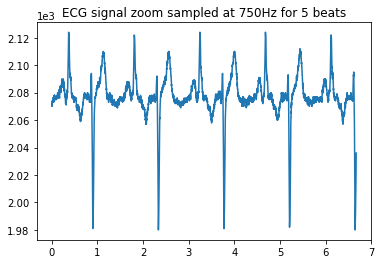

In [285]:
x=np.arange(0,5000/75e1,1/75e1)  

plt.plot(x,AllSignal[:5000])
plt.title('ECG signal zoom sampled at 750Hz for 5 beats')

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))


(Q7) Deduction

Comparing the values of the beats per second for 5 beats obtained above, the heart rate is observed to be lower for this individual

(Q8) Determining Heart Rate from Plot

In [286]:
p=np.amax(AllSignal[:5000])
print ('Peak value is   '   +str(p)) # QRS complex


Peak value is   2124


In [280]:
a=np.arange(21541)# for L/2
B=0
for index in a:
    if AllSignal[index]>=2124: #counting number of peaks at same level
        B=B+1
print 'Heart rate in Bpm is ' +str(B*2)   

Heart rate in Bpm is 44


(Q9) Obtaining DFT of The ECG Signal

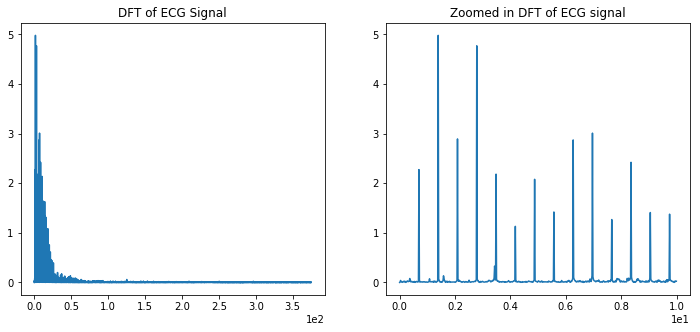

In [281]:
Trace=AllSignal[:43081]
dataF=Trace-np.mean(Trace) #eliminating dc components
L=len(dataF)
f=np.arange(0,75e1/2,75e1/43081)
Y=np.fft.fft(dataF)
PyyClean=abs(Y)/L

plt.figure (figsize=(12,5))
plt.subplot(121)
plt.plot(f, PyyClean[:21541]) #L/2
plt.title('DFT of ECG Signal')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

inx=np.where(f>1e1)
inx=inx[0]
plt.subplot(122)
plt.plot(f[:inx[0]], PyyClean[:inx[0]])
plt.title('Zoomed in DFT of ECG signal')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

(Q10) Obtaining Frequency At Peak Value (Maximum)

In [282]:
x=np.amax(PyyClean)

print "maximum peak observed at  " + str(x)
L2=np.arange(21541)
for index in L2:
    if PyyClean[index]>=4.9814:
        print 'Corresponding Frequency value obtained as f(HZ)=' +str(index/57.44) #defined as Fpeak
        break 


maximum peak observed at  4.98176674504
Corresponding Frequency value obtained as f(HZ)=1.39275766017


(Q11) Calculating Heart Rate From Spectrum

                                              Heart Rate(bpm) = 60/(Fpeak)
                                              H .R = 60/1.39275766017
                                              H.R = 43.08 ≈ 43bpm

(Q12) Discussion

From the section above, the DFT spectrum indicates the peak of the ECG signal and using python we obtained the exact amplitude at this point and obtained its corresponding frequency value.

Using the equation;            Heart Rate = 60/Fpeak

The heart rate of the patient was calculated n beats per minute (bpm)

(Q13) By applying a filter that affects the amplitude (QRS complex) it causes a distortion in the signal, hence it would be a problem, because QRS amplitude detection is a major characteristic in determining heart rate and carrying out further clinical analysis. [3]

(Q14) Filtering The ECG Signal

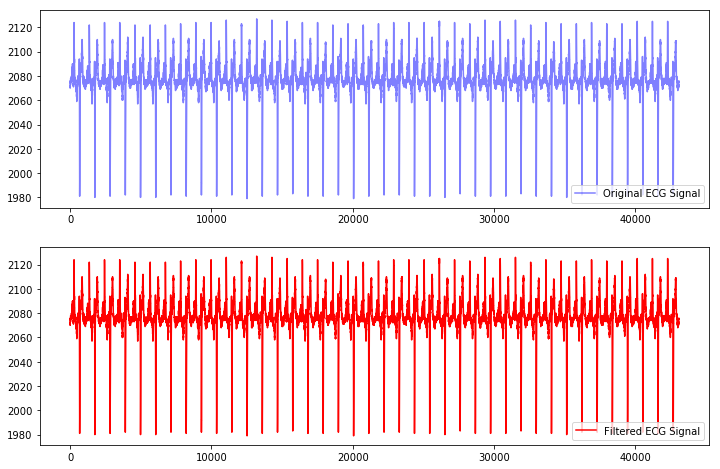

In [269]:
from scipy.signal import butter, lfilter 
def butter_lowpass(cutoff, fs, order=4):
    nyq = 0.5 * fs #Nyquist frequeny is half the sampling frequency
    normal_cutoff = cutoff / nyq 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a
    
def butter_lowpass_filter(data, cutoff, fs, order):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

filtered = butter_lowpass_filter(Trace, 10e1, 200.0, 4)#cutoff, sampling frequency and order

plt.figure (figsize=(12,8))
plt.subplot(211)
plt.plot(Trace, color='Blue', alpha=0.5, label='Original ECG Signal')
plt.legend(loc=4)
plt.subplot(212)
plt.plot(filtered, color='Red', label='Filtered ECG Signal')

plt.legend(loc=4)
plt.show()




QUESTION 15

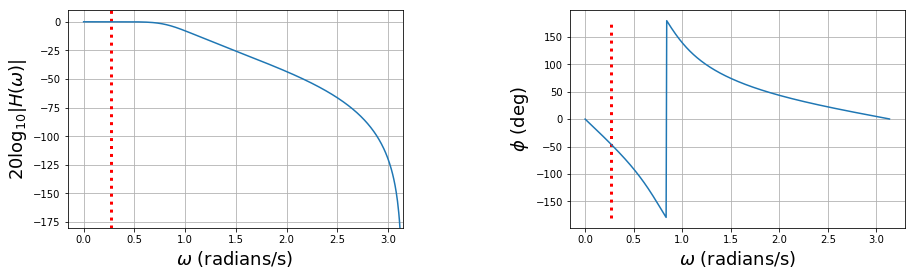

In [283]:
 from scipy import signal
import numpy as np
from __future__ import division
from matplotlib import gridspec
fig=plt.figure()
fig.set_size_inches((15,10))

fs=750
NF=fs/2
cutoff= 100
Wn=100/NF
b,a=signal.butter(4,Wn,btype='low',analog= False)
w,h=signal.freqz(b,a)
s=signal.lfilter(b,a,dataF)
x=np.arange(0,43081/750.,1/750. )  #start,stop,step
ax = fig.add_subplot(plt.subplot(gs[0,0]))
ax.plot(w, 20 * np.log10(abs(h)))
ax.set_ylabel(r"$ 20 \log_{10}|H(\omega)| $",fontsize=18)
ax.set_xlabel(r'$\omega$ (radians/s)',fontsize=18)
ax.set_xlim(xmax = np.pi)
ax.set_ylim(ymin=-180,ymax=10)
ax.vlines(Wn,-180,180,linestyles=':',color='r',lw=3.)
ax.grid()
ax = fig.add_subplot(plt.subplot(gs[0,1]))
plt.plot(w,np.angle(h)/np.pi*180)

ax.set_xlabel(r'$\omega$ (radians/s)',fontsize=18)
ax.set_ylabel(r"$\phi $ (deg)",fontsize=18)
ax.vlines(Wn,-180,180,linestyles=':',color='r',lw=3.)
ax.grid()

(Q 16)   Obtaining The DFT of The Filtered Signal

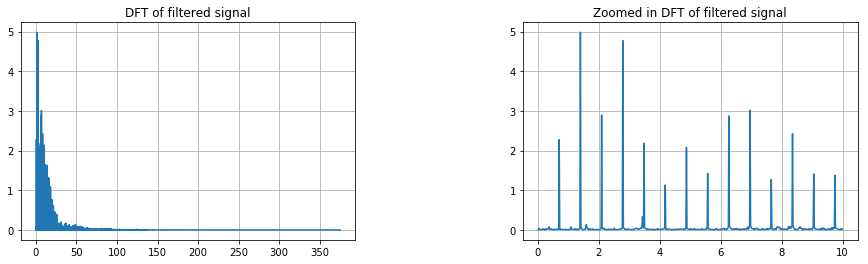

In [287]:
from matplotlib import gridspec
fig=plt.figure()
fig.set_size_inches((15,10))
LL=len(s)
ff=np.arange(0,750/2,750/43081.)
YY=np.fft.fft(s)
Pyy=abs(YY)/LL

ax = fig.add_subplot(plt.subplot(gs[0,0]))
ax.plot(ff, Pyy[:21541])
ax.set_title('DFT of filtered signal')
ax.grid()
indx=np.where(f>1e1)
indx=indx[0]
ax = fig.add_subplot(plt.subplot(gs[0,1]))
ax.plot(ff[:indx[0]], Pyy[:indx[0]])
ax.set_title('Zoomed in DFT of filtered signal')
ax.grid()

(Q17) Observation

From the plot shown in Q14, comparing the  shape of the original ECG signal and filtered ECG signal it can be observed that applying he filter has no effect. The low pass filter applied was to remve just high frequency components(higher than the cutoff frequency) in the signal and given that there was no change in the signal we can conclude that the original ECG signal contains frequency components F ≤ 100HZ.

References
---------------

1. Nayak, Seema. "Filtering techniques for ECG signal processing." (2012).

2. Gacek, Adam, and Witold Pedrycz, eds. ECG signal processing, classification and interpretation: a comprehensive framework of computational intelligence. Springer Science & Business Media, 2011.

3. Ricciardi, Danilo, et al. "Impact of the high-frequency cutoff of bandpass filtering on ECG quality and clinical interpretation: a comparison between 40Hz and 150Hz cutoff in a surgical preoperative adult outpatient population." Journal of electrocardiology 49.5 (2016): 691-695.